# Comparison of the continuum and discrete smeared delta functions

In the case of non-subtraced spectral densities, the inversion of the Laplace transform can be performed exactly. The regulation of the procedure introduce on the spectral density a smearing, which is a smeared delta functions. Since we expect that the procedure of the extraction of the spectral density is exact, we expect that the delta function in the continuum, $\delta_\alpha(\omega, \omega')$ and the discretized version, $\bar{\delta}_\alpha(\omega, \omega') $ are equal for every $\omega, \omega'$. This notebook want to verify this hypothesis.

In [54]:
import numpy as np
import mpmath as mp
from matplotlib import pyplot as plt
from spectral_density import SDan

plt.style.use("my_style.mplstyle")
mp.mp.dps = 30

def delta(w1, w2, alpha):
    f = lambda x: ((w1*w2)**mp.mpf('-1/2')*(w2/w1)**mp.mpc('0', x)/(1 + alpha * mp.cosh(mp.pi * x)/mp.pi)).real
    return mp.quad(f, [0, mp.inf])/(mp.pi)
    
def v_s(s:float, w:float):
    a1 = mp.mpc('1/2', str(s))
    a2 = mp.mpc('3/2', str(s))
    lambda_s = mp.gamma(a1)
    N_s = mp.sqrt(mp.mpf('2') * mp.pi) * lambda_s * \
        mp.gamma(mp.mpc('0', mp.mpf('-2') * mp.mpf(str(s))))/mp.gamma(mp.mpc('3/2', mp.mpf(str(-s))))
    z = mp.exp(-mp.mpf(str(w)))
    return (mp.hyp2f1(a1, a2, mp.mpf('2'), z) * (1-z)**(mp.mpc('-1/2', str(s))) * z * mp.fabs(lambda_s) ** (mp.mpf('2')) / mp.fabs(N_s)).real  

def delta_bar(w1, w2, alpha, s_max):
    f = lambda x: v_s(x, w1) * v_s(x, w2) /(1 + alpha * mp.cosh(mp.pi * x)/mp.pi)
    return mp.quad(f, [0, s_max])


In [56]:
S = SDan()
w = np.linspace(0.01, 1.0, 51)
d, d_bar = np.zeros(len(w)), np.zeros(len(w))
for wi in range(len(w)):
    print(wi)
    d[wi] = delta(w[wi], 0.5, 1e-6)
    d_bar[wi] = float(delta_bar(w[wi], 0.5, 1e-6, 100))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


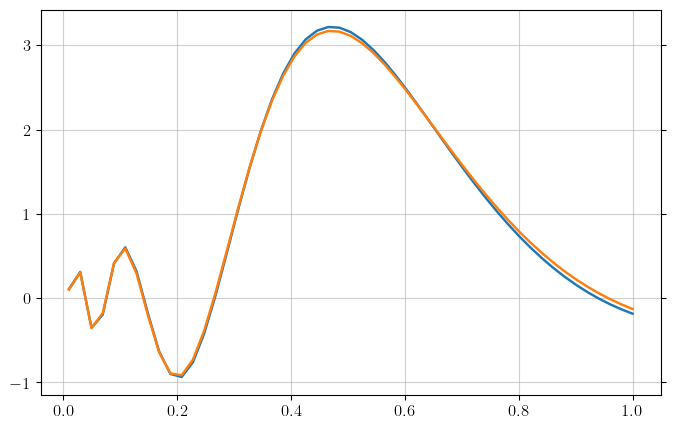

In [57]:
plt.plot(w, d)
plt.plot(w, d_bar)